In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's start by creating some random linear data with random **Gaussian noise**. 

This concept is interesting for creating synthetic datasets.

Let: 

$ \theta_0 = 4 $, $\theta_1 = 3$

Let's add some Gaussian noise to the data.

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X+np.random.randn(100,1)

Plot the generated data using **matplotlib**, check teh relation between _X_ and _y_

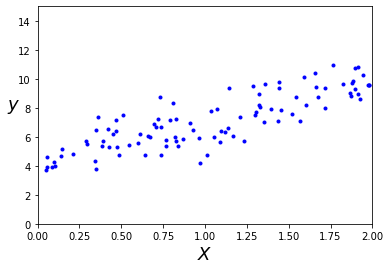

In [3]:
plt.plot(X, y, 'b.')
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
_ = plt.axis([0,2,0,15])

This is a nice example of linear data. Remember then that the function of the slope is as follows:

We define the cost forumla as:

$$J(\theta) = \theta_0 + \theta_1 . X$$

So at every step of the model, we should see $J(\theta)$ descrease.

Mathematically, you represent those formulas as:

**Cost**

$$ J(\theta) = 1/2 * m * \sum_{i=1}^{m}(h*\theta^i y^i)^2$$


**Gradient**

$$ \dfrac{\delta J(\theta)}{\delta\theta_j} = 1/m *  \sum_{i=1}^{m}(h*\theta^i) X^i_j$$


**Gradient descent general forumla**
$$ \delta_j := \alpha(1/m *  \sum_{i=1}^{m}(h*\theta^i) X^i_j) $$



* Where _m = number of observations_ 
* The Graident equation stands for the _MEAN SQUARED ERROR(MSE)_ equation.
* alpha is the learning rate.

### Create a gradient descent algorithm

#### Cost forumla

In [4]:
def cal_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

#### Gradient Descent


In [5]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

### Test different learning rates, and plot them.

#### using a learning rate of 0.001

In [6]:
lr =0.0001
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          0.836,
Theta1:          0.521
Final cost/MSE:  177345.580


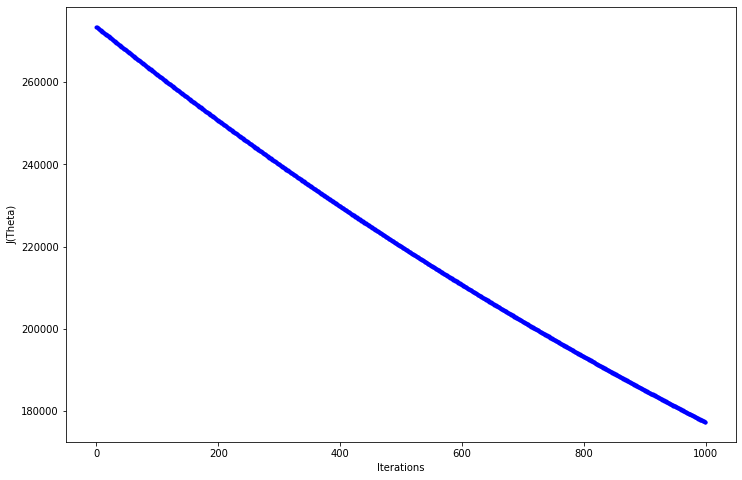

In [7]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

#### using a learning rate of 0.01

In [8]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.879,
Theta1:          3.084
Final cost/MSE:  5390.232


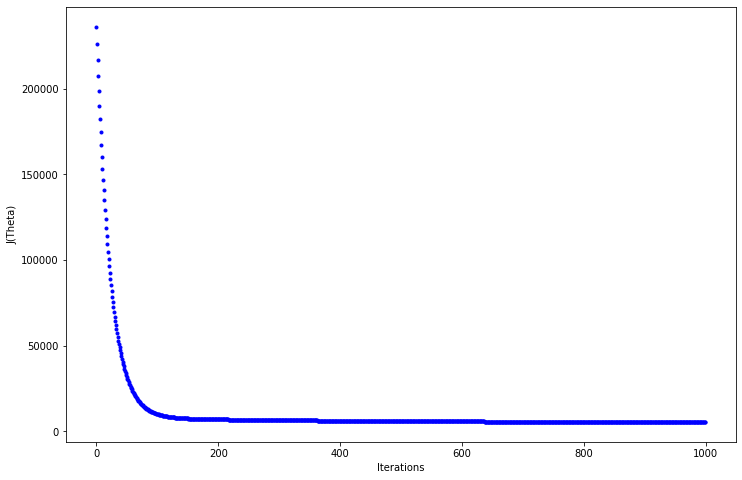

In [9]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

#### using a learning rate of 0.1

In [10]:
lr =0.1
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.242,
Theta1:          2.782
Final cost/MSE:  5227.043


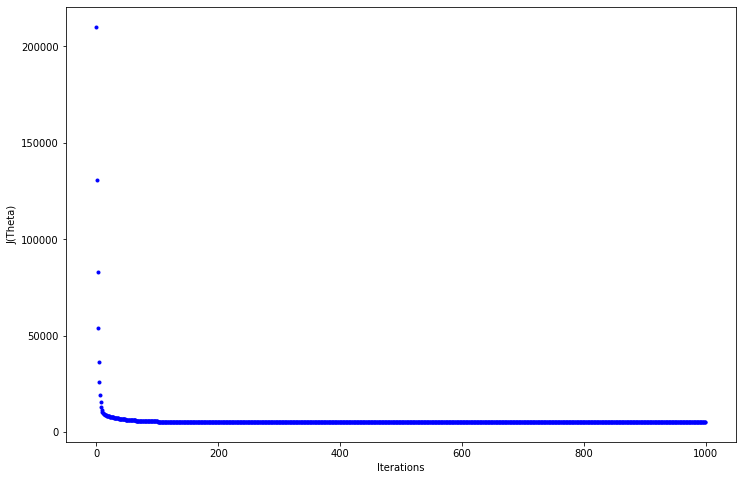

In [11]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

#### using a learning rate of 2 (fails)

In [12]:
lr =2
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          nan,
Theta1:          nan
Final cost/MSE:  nan


<ipython-input-4-4e2a97a25e64>:4: RuntimeWarning: overflow encountered in double_scalars
  cost = (1/2*m) * np.sum(np.square(predictions-y))
/home/diego/Training/AI-Zero2Hero/Hands-On-ML-w-Keras-Tensorflow-Scikit/Chapter2-End-to-end-project/project1_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-4-4e2a97a25e64>:4: RuntimeWarning: overflow encountered in square
  cost = (1/2*m) * np.sum(np.square(predictions-y))
<ipython-input-5-ae4df57acf4e>:18: RuntimeWarning: invalid value encountered in subtract
  theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
